In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd
import random
sys.path.append(os.path.abspath('./src/'))
from ActivationFunctions import *
from NeuralNetwork import *

from sklearn.preprocessing import MinMaxScaler

RANDOM_STATE = 12345

In [2]:
def multy_plot(datas, labels, title, scale='linear'):
    x = np.arange(0, len(datas[0])).tolist()

    for i, el in enumerate(datas):
        plt.plot(x, el, label=labels[i])


    plt.title(title)
    plt.grid()
    plt.legend()
    plt.yscale(scale)
    plt.show()

In [3]:
def create_dataset(n_items, n_input, input_range, output_functions, seed):
    random.seed(seed)

    n_output = len(output_functions)
    x = np.ndarray((n_items, n_input + n_output))

    for i in range(n_items):
        for l in range(n_input):
            x[i,l] = random.randrange(input_range[0], input_range[1], input_range[2])

        for l, fun in enumerate(output_functions):
            
            x[i, n_input + l] = fun(x[i][:n_input])
            #print(x[i][:n_input], fun(x[i][:n_input]), x[i, l])

    return pd.DataFrame(x, columns = ['input_' + str(i + 1) for i in range(n_input)] + ['output_' + str(i + 1) for i in range(n_output)])

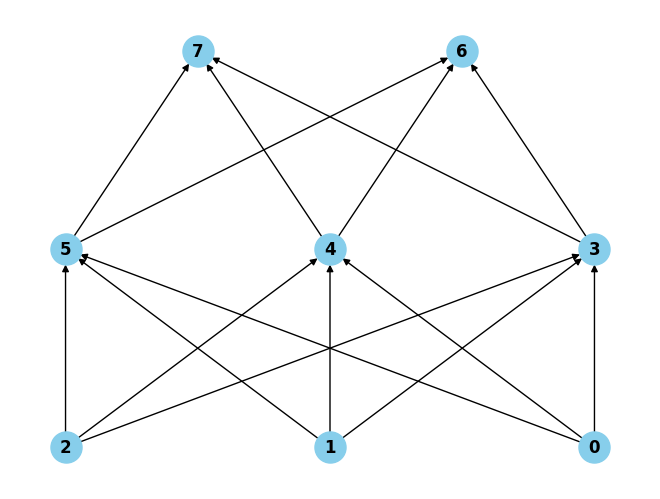

In [4]:
topology_1 = {'0': ['input', 'None', [], ['3', '4', '5']], 
            '1': ['input', 'None', [], ['3', '4', '5']],
            '2': ['input', 'None', [], ['3', '4', '5']],

            '3': ['hidden', 'sigmoid', ['0','1','2'], ['6', '7']],
            '4': ['hidden', 'sigmoid', ['0','1','2'], ['6', '7']],
            '5': ['hidden', 'sigmoid', ['0','1','2'], ['6', '7']],

            '6': ['output', 'identity', ['3','4','5'], []],
            '7': ['output', 'identity', ['3','4','5'], []]}
NeuralNetwork.display_topology(topology_1)

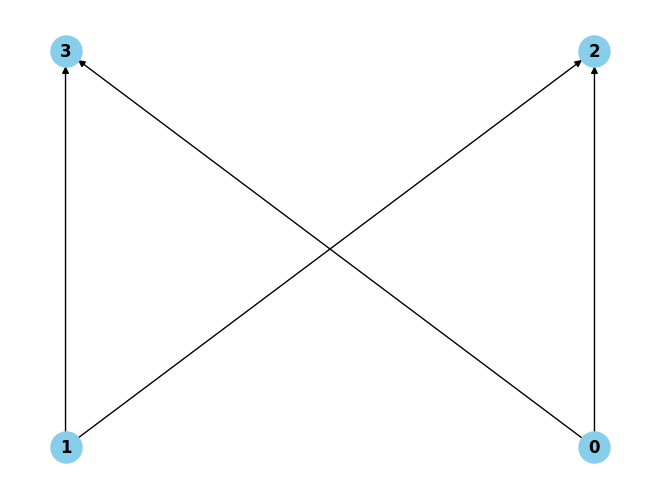

In [5]:
topology_2 = {'0': ['input', 'None', [], ['2', '3']],
              '1': ['input', 'None', [], ['2', '3']], 
              '2': ['output', 'identity', ['0', '1'], []],
              '3': ['output', 'identity', ['0', '1'], []]}
NeuralNetwork.display_topology(topology_2)

In [6]:
NN = NeuralNetwork(topology_2, -0.75, 0.75, True, RANDOM_STATE)
print(NN)

Instance Attributes:
input_size: 2
output_size: 2
neurons: [InputNeuron(index=1,
	type=input,
	successors=[2, 3, ],
	n_successors=2,
	last_predict=0.0,
	delta_error=0,
	old_weight_update=0,
	w=[0],
	), InputNeuron(index=0,
	type=input,
	successors=[2, 3, ],
	n_successors=2,
	last_predict=0.0,
	delta_error=0,
	old_weight_update=0,
	w=[0],
	), OutputNeuron(index=3,
	type=output,
	predecessors=[0, 1, ],
	n_predecessors=2,
	w=[ 0.26438201 -0.16333567 -0.25077911],
	f=<function ActivationFunctions.identity at 0x0000025877993380>,
	f_parameters=[0.0, 1.0],
	net=0.0,
	last_predict=0.0,
	delta_error=0.0,
	partial_weight_update=[0. 0. 0.],
	old_weight_update=[0. 0. 0.],
	), OutputNeuron(index=2,
	type=output,
	predecessors=[0, 1, ],
	n_predecessors=2,
	w=[-0.40899597 -0.27486249  0.44604819],
	f=<function ActivationFunctions.identity at 0x0000025877993380>,
	f_parameters=[0.0, 1.0],
	net=0.0,
	last_predict=0.0,
	delta_error=0.0,
	partial_weight_update=[0. 0. 0.],
	old_weight_update=[0. 0. 0.],


In [7]:
tr_1_input = 2
tr_1_output = 2
len_dataset = 500
tr_1 = create_dataset(len_dataset, tr_1_input, [0, 1000, 1], [lambda x : 2*x[0] + x[1] + 0.345, lambda x : -2*x[0] + x[1] - 1.12], RANDOM_STATE)
tr_1.sample(10, random_state=RANDOM_STATE)

,input_1,input_2,output_1,output_2
272,920.0,340.0,2180.345,-1501.12
244,575.0,255.0,1405.345,-896.12
271,962.0,490.0,2414.345,-1435.12
381,101.0,175.0,377.345,-28.12
52,308.0,885.0,1501.345,267.88
48,602.0,444.0,1648.345,-761.12
299,676.0,829.0,2181.345,-524.12
452,135.0,536.0,806.345,264.88
295,943.0,698.0,2584.345,-1189.12
85,153.0,550.0,856.345,242.88


In [8]:
scaler_out = MinMaxScaler()
scaler_in = MinMaxScaler()
scaler_in.fit(tr_1.values[:,:2])
scaler_out.fit(tr_1.values[:,2:])
tr_1_normalized = np.empty((len_dataset, tr_1_output+tr_1_input))
tr_1_normalized[:,:2] = scaler_in.transform(tr_1.values[:,:2])
tr_1_normalized[:,2:] = scaler_out.transform(tr_1.values[:,2:])

In [9]:
tr_1_normalized

array([[0.42627884, 0.75403226, 0.54526749, 0.6384535 ],
       [0.00902708, 0.84375   , 0.29046639, 0.95924765],
       [0.84653962, 0.8266129 , 0.85733882, 0.37164751],
       ...,
       [0.49348044, 0.625     , 0.5473251 , 0.5471961 ],
       [0.59879639, 0.22983871, 0.48491084, 0.33751306],
       [0.34603811, 0.65423387, 0.45644719, 0.65970045]])

In [10]:
training_set = tr_1.values

batch_size = 20
max_epochs = 500
error_decrease_tolerance = 0.0001
patience = 5

learning_rate = 0.01/batch_size
lambda_tikhonov = 0
alpha_momentum = 0

stats = NN.train_2(tr_1_normalized, batch_size, max_epochs, error_decrease_tolerance, patience, 
                   learning_rate, lambda_tikhonov, alpha_momentum)

In [11]:
predictions = scaler_out.inverse_transform(NN.predict_array(tr_1_normalized[:,:2]))

In [12]:
for key in list(stats.keys())[:9]:
    print(key, ':', stats[key])

training_set_len : 500
minibatch_size : 20
max_epochs : 500
error_decrease_tolerance : 0.0001
patience : 5
learning_rate : 0.0005
lambda_tikhonov : 0
alpha_momentum : 0
epochs : 500


In [13]:
stats['training_error']

[1.019843072176195,
 0.7674409815698732,
 0.6104114889682962,
 0.516887075043325,
 0.4630459220843834,
 0.4325659984887355,
 0.4142160283814601,
 0.401804122167848,
 0.39219224371634825,
 0.3839710516730822,
 0.37648400171991514,
 0.3694147059400326,
 0.3626093333061084,
 0.3559940080089161,
 0.349533110561878,
 0.3432042392553565,
 0.33699675491694603,
 0.3309055037619367,
 0.32492733258048406,
 0.3190599072404643,
 0.3133012182855842,
 0.3076493714571706,
 0.30210250508846975,
 0.2966587630248083,
 0.29131629042066925,
 0.2860732378059048,
 0.2809277671924317,
 0.275878057801012,
 0.27092231065339006,
 0.2660587519554602,
 0.26128563543821354,
 0.25660124387827743,
 0.2520038900035749,
 0.24749191695185824,
 0.24306369841077508,
 0.23871763853472852,
 0.23445217170754276,
 0.23026576220023703,
 0.2261569037587871,
 0.22212411914638508,
 0.21816595965732433,
 0.2142810046144293,
 0.21046786085828406,
 0.2067251622339498,
 0.20305156907907196,
 0.19944576771602737,
 0.19590646994989513

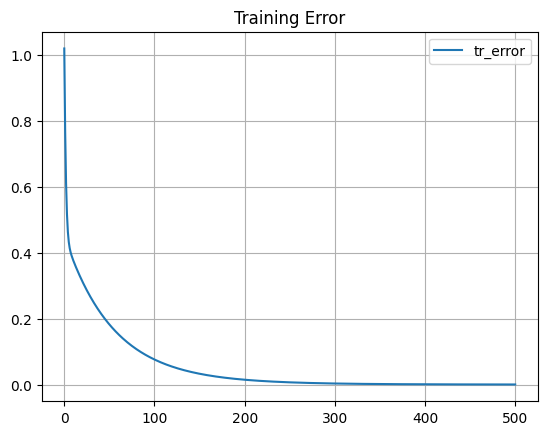

In [14]:
multy_plot([stats['training_error']], ['tr_error'], 'Training Error')

In [15]:
np.array(stats['units_weights'][2]).T

array([[-0.40899597, -0.23322535, -0.10957695, ...,  0.67368725,
         0.67369151,  0.67369571],
       [-0.27486249, -0.18129473, -0.1140463 , ...,  0.34584184,
         0.34583747,  0.34583316],
       [ 0.44604819,  0.50412959,  0.53634124, ..., -0.69426707,
        -0.69427114, -0.69427513]])

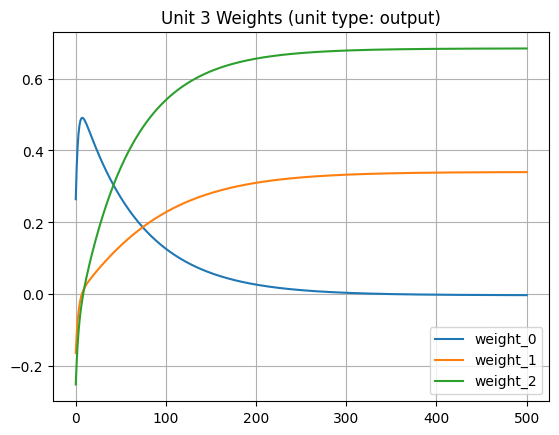

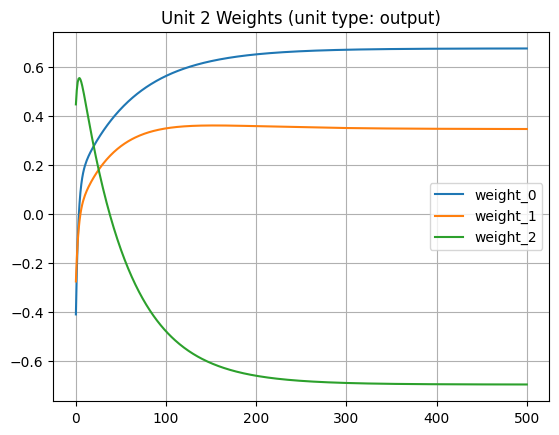

In [16]:
for unit_index in stats['units_weights'].keys():
    vals = np.array(stats['units_weights'][unit_index]).T
    multy_plot(vals, 
               ['weight_' + str(i) for i in range(len(vals))], 
               'Unit ' + str(unit_index) + ' Weights (unit type: ' + NN.neurons[unit_index].type + ')')

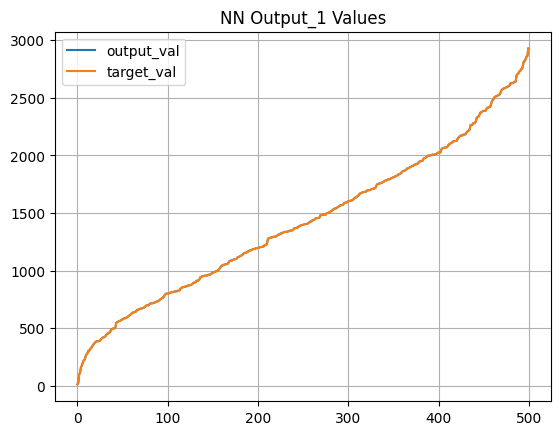

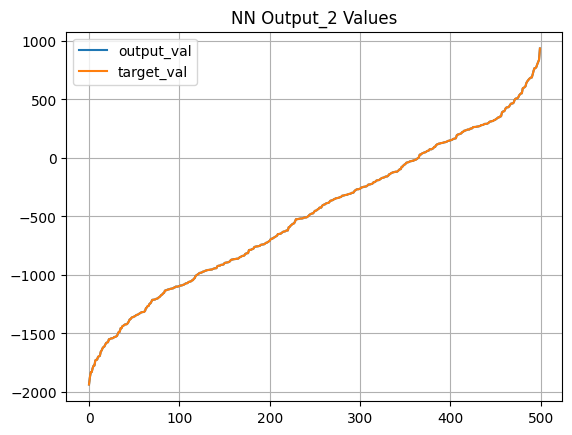

In [17]:
for i in range(tr_1_output):
    sorted_order = training_set[:, tr_1_input + i].argsort()
    multy_plot([predictions[sorted_order][:,i] , training_set[sorted_order][:,tr_1_input + i]], 
                ['output_val', 'target_val'], 
                'NN Output_' + str(i + 1) +  ' Values')

In [23]:
NN = NeuralNetwork(topology_2, -0.75, 0.75, True, RANDOM_STATE)

tr_2_input = 2
tr_2_output = 2
len_dataset = 500
tr_2 = create_dataset(len_dataset, tr_1_input, [0, 50, 1], [lambda x : -3*x[0] + x[1]**2 + 15, lambda x : 2*x[0] + 15*x[1] - 50], RANDOM_STATE)
tr_2.sample(10, random_state=RANDOM_STATE)

scaler_2_out = MinMaxScaler()
scaler_2_in = MinMaxScaler()
scaler_2_in.fit(tr_2.values[:,:2])
scaler_2_out.fit(tr_2.values[:,2:])
tr_2_normalized = np.empty((len_dataset, tr_2_output+tr_2_input))
tr_2_normalized[:,:2] = scaler_2_in.transform(tr_2.values[:,:2])
tr_2_normalized[:,2:] = scaler_2_out.transform(tr_2.values[:,2:])

training_set = tr_2.values
batch_size = 20
max_epochs = 500
error_decrease_tolerance = 0.00001
patience = 5
learning_rate = 0.01/batch_size
lambda_tikhonov = 0
alpha_momentum = 0

stats = NN.train_2(tr_2_normalized, batch_size, max_epochs, error_decrease_tolerance, patience, 
                   learning_rate, lambda_tikhonov, alpha_momentum)
predictions = scaler_2_out.inverse_transform(NN.predict_array(tr_2_normalized[:,:2]))

In [24]:
for key in list(stats.keys())[:9]:
    print(key, ':', stats[key])

training_set_len : 500
minibatch_size : 20
max_epochs : 500
error_decrease_tolerance : 1e-05
patience : 5
learning_rate : 0.0005
lambda_tikhonov : 0
alpha_momentum : 0
epochs : 387


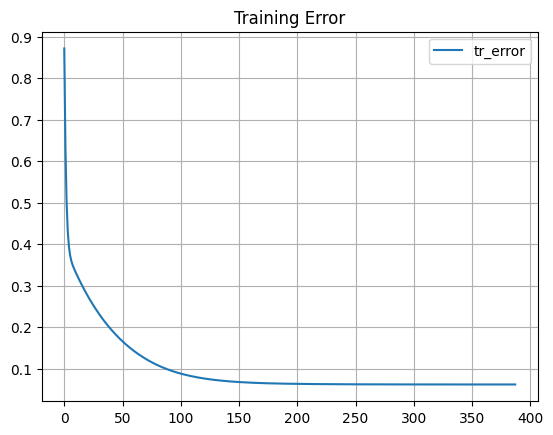

In [25]:
multy_plot([stats['training_error']], ['tr_error'], 'Training Error')

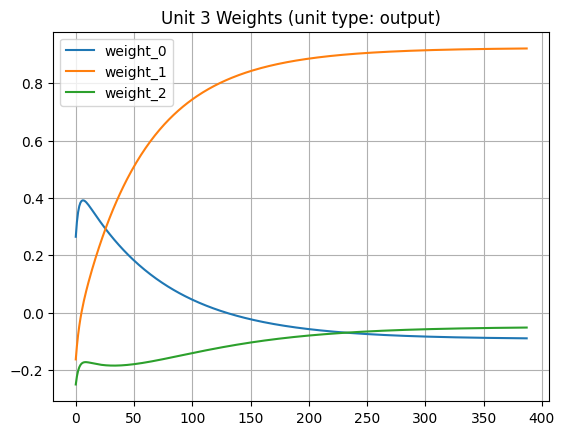

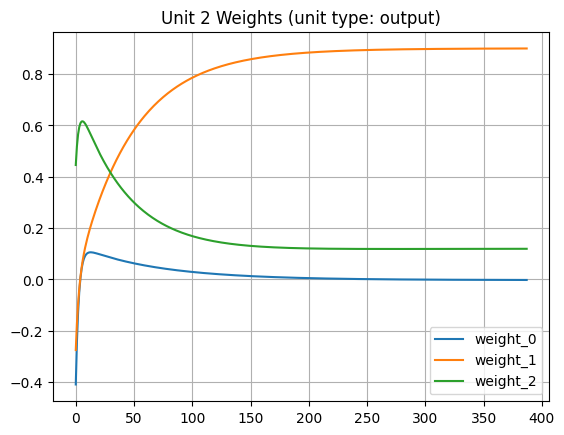

In [26]:
for unit_index in stats['units_weights'].keys():
    vals = np.array(stats['units_weights'][unit_index]).T
    multy_plot(vals, 
               ['weight_' + str(i) for i in range(len(vals))], 
               'Unit ' + str(unit_index) + ' Weights (unit type: ' + NN.neurons[unit_index].type + ')')

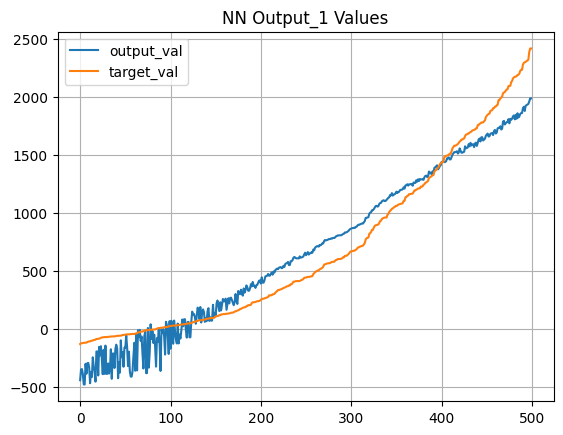

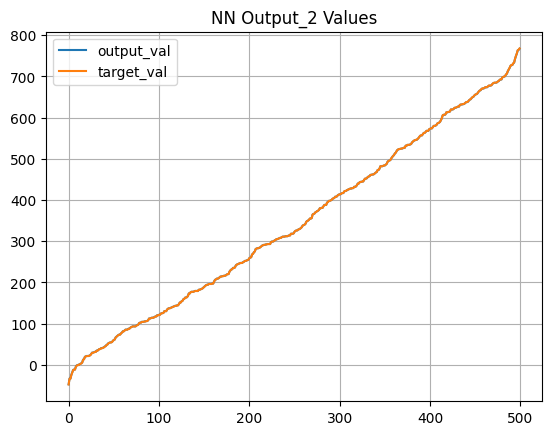

In [27]:
for i in range(tr_2_output):
    sorted_order = training_set[:, tr_2_input + i].argsort()
    multy_plot([predictions[sorted_order][:,i] , training_set[sorted_order][:,tr_2_input + i]], 
                ['output_val', 'target_val'], 
                'NN Output_' + str(i + 1) +  ' Values')